# Predicting Term Deposit Subscription — Bank Marketing Dataset

## This project uses the [Bank Marketing dataset](https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv).  
## The goal is to predict whether a client will subscribe to a term deposit (`y` column) based on demographic and marketing campaign data.  

## By the way I participated in that competition and I got 0.97205 / 0.97243 scores and was 731/3365 in top
## https://www.kaggle.com/competitions/playground-series-s5e8


## The dataset is pre-cleaned, with missing values handled and data types adjusted for modeling during the last homework.

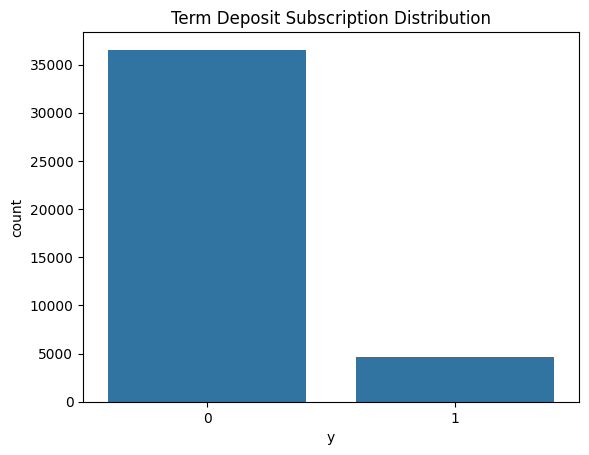

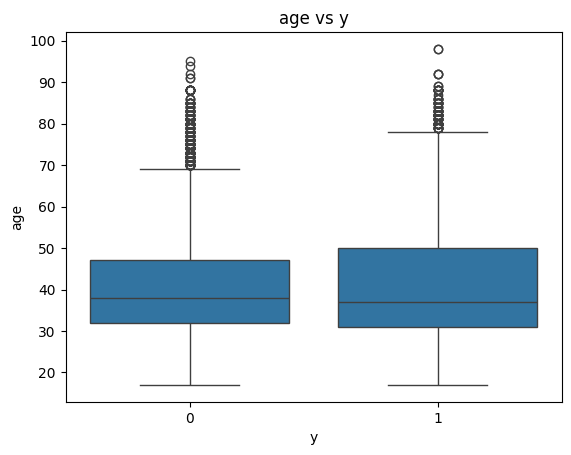

corellation duration and y: 0.405


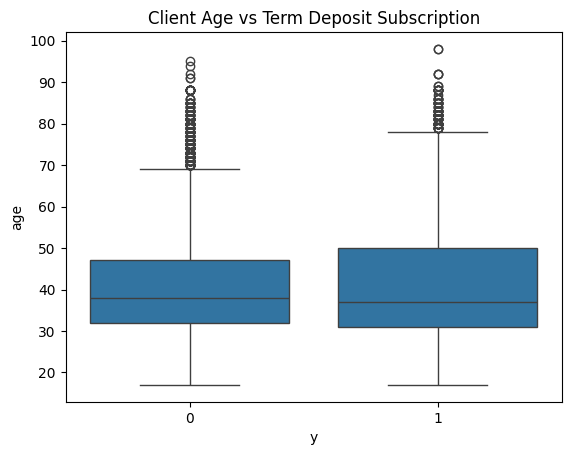

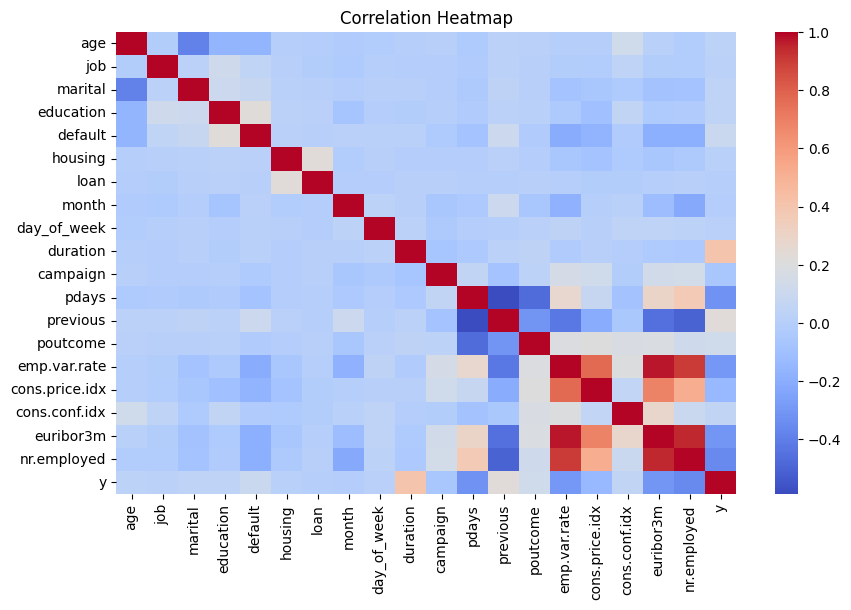

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank.csv')

sns.countplot(x='y', data=df)
plt.title('Term Deposit Subscription Distribution')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='y', y='age', data=df)
plt.title('age vs y')
plt.show()

corr_value = df['duration'].corr(df['y'])
print(f'corellation duration and y: {corr_value:.3f}')

sns.boxplot(x='y', y='age', data=df)
plt.title('Client Age vs Term Deposit Subscription')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


# Building the model

## Here is two models
### One is LinearRegression as it was said in homework and the second is LogisticRegression

The class distribution shows that most clients did not subscribe to the deposit, which creates a class imbalance.
When comparing ages, it is evident that clients who agreed to the deposit are on average slightly older than those who refused, although the difference is minor.

The most informative feature proved to be **`duration`** — the length of the call.
The chart shows that for clients who agreed to the deposit (`y = 1`), calls are significantly longer.
This is logical: the longer the manager communicates with the client, the higher the likelihood that the client becomes interested and eventually agrees to the offer.

The correlation heatmap also confirms that `duration` has the strongest positive correlation with the target variable `y`.
Thus, this feature may be a key factor when building a model to predict deposit subscription.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('y', axis=1)
y = df['y']

# One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
Logistic Regression
"""

# model = LinearRegression(max_iter=1000)
# model.fit(X_train, y_train)

"""
Linear Regression
"""
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

R²: 0.33950887582835343
MSE: 0.06645632511734499


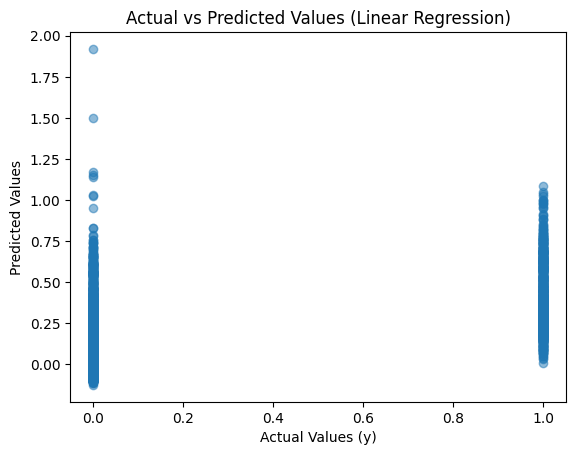

'\n# Logistic Regression Evaluation\n\n\ny_pred = model.predict(X_test)\n\nprint(Accuracy:", accuracy_score(y_test, y_pred))\nprint("\nreport:")\nprint(classification_report(y_test, y_pred))\n\nplt.figure(figsize=(5,4))\nsns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=\'d\', cmap=\'Blues\')\nplt.title(\'Confusion Matrix\')\nplt.xlabel(\'Predicted Values\')\nplt.ylabel(\'Actual Values\')\nplt.show()\n'

In [15]:
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values')
plt.show()


"""
# Logistic Regression Evaluation


y_pred = model.predict(X_test)

print(Accuracy:", accuracy_score(y_test, y_pred))
print("\nreport:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
"""


# Visualisation

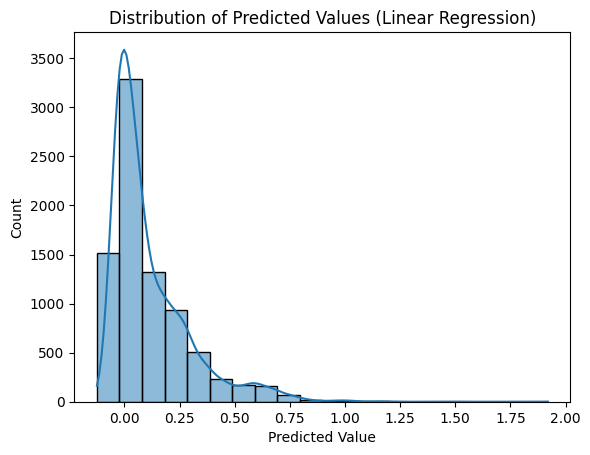

"\n# Logistic Regression Visualisation\n\ny_proba = model.predict_proba(X_test)[:, 1]\n\nsns.histplot(y_proba, bins=20, kde=True)\nplt.title('Logistic Regression')\nplt.xlabel('Probability')\nplt.ylabel('Count')\nplt.show()\n"

In [16]:
sns.histplot(y_pred, bins=20, kde=True)
plt.title('Distribution of Predicted Values (Linear Regression)')
plt.xlabel('Predicted Value')
plt.ylabel('Count')
plt.show()

"""
# Logistic Regression Visualisation

y_proba = model.predict_proba(X_test)[:, 1]

sns.histplot(y_proba, bins=20, kde=True)
plt.title('Logistic Regression')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
"""